In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, adjusted_rand_score

In [24]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
print("Number of samples:", len(newsgroups.data))
print("Number of categories:", len(newsgroups.target_names))
print("Categories:")
print(newsgroups.target_names[:])

Number of samples: 18846
Number of categories: 20
Categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [25]:
texts = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names

In [26]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF Shape:", X_tfidf.shape)

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("After SVD Shape:", X_svd.shape)

TF-IDF Shape: (18846, 34875)
After SVD Shape: (18846, 2)


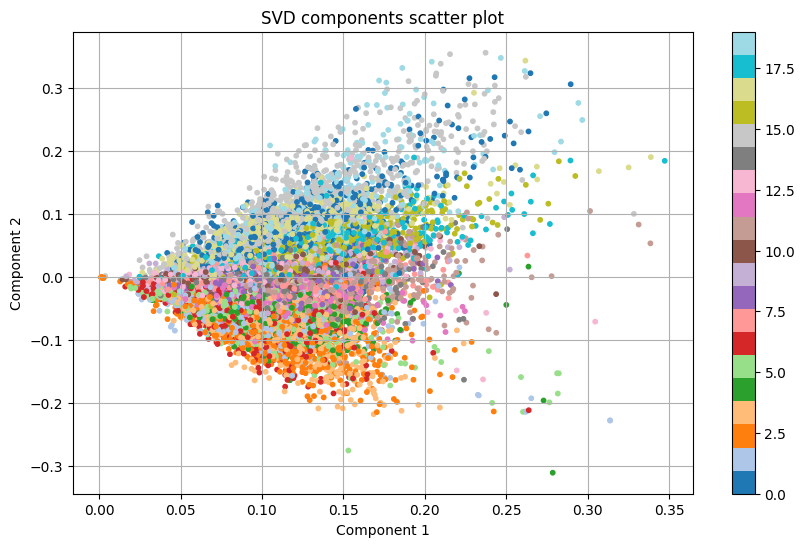

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', s=10)
plt.title("SVD components scatter plot")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.colorbar()
plt.show()

In [28]:
kmeans = KMeans(n_clusters=20, random_state=42)
predicted_clusters = kmeans.fit_predict(X_svd)
sil_score = silhouette_score(X_svd, predicted_clusters)
print("Silhouette Score for KMeans with 20 clusters:", sil_score)

Silhouette Score for KMeans with 20 clusters: 0.3201433565824544


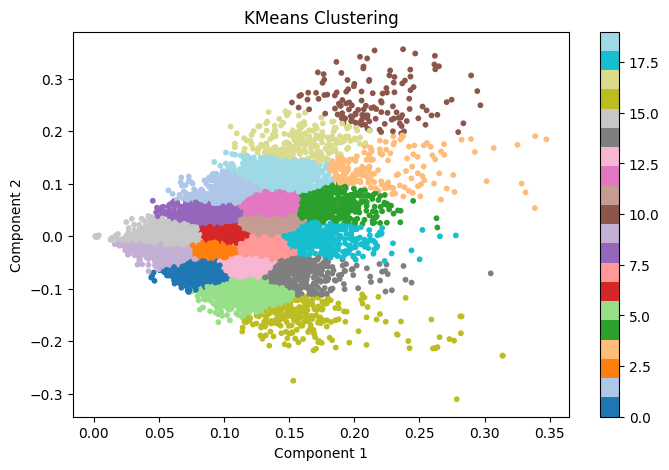

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=predicted_clusters, cmap='tab20', s=10)
plt.title("KMeans Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()